In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Regression**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [8]:
# Load the dataset
file_path = '/content/drive/MyDrive/Air Quality.csv'
df = pd.read_csv("Air Quality.csv")

In [9]:
# Display basic info about the dataset
print("Dataset Information:")
print(df.info())
# Display actual column names
print("Columns in dataset:", df.columns)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memor

In [10]:
# Display the first few rows
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


First 5 Rows of the Dataset:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18:00:00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19:00:00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20:00:00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21:00:00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN  

In [11]:
# Display dataset shape
print("\nDataset Shape (Rows, Columns):", df.shape)
# Manually check and update column names based on the actual output
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']  # Ensure exact match
target = 'O3'  # Ensure this exists in the dataset

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()


Dataset Shape (Rows, Columns): (9471, 17)


In [12]:
# Display column names
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [13]:
# Check for missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())
# Verify columns exist before selection
missing_features = [col for col in features if col not in df.columns]
if missing_features:
    print(f"⚠️ Warning: The following features are missing in the dataset: {missing_features}")
else:
    # Proceed with feature selection
    X = df[features]
    y = df[target]

    print("✅ Feature selection successful!")


Missing Values Before Cleaning:
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64
⚠️ Warning: The following features are missing in the dataset: ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']


In [14]:
# Drop completely empty columns
df_cleaned = df.drop(columns=["Unnamed: 15", "Unnamed: 16"], errors="ignore")

In [15]:
# Convert Date and Time into a single DateTime column
df_cleaned["Datetime"] = pd.to_datetime(df_cleaned["Date"] + " " + df_cleaned["Time"], errors="coerce")


In [16]:
# Drop original Date and Time columns
df_cleaned = df_cleaned.drop(columns=["Date", "Time"], errors="ignore")

In [17]:
# Replace -200 values with NaN (assuming they indicate missing data)
df_cleaned = df_cleaned.applymap(lambda x: np.nan if x == -200 else x)

<ipython-input-17-59c9bd6de590>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: np.nan if x == -200 else x)


In [18]:
# Check missing values again after cleaning
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())


Missing Values After Cleaning:
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Datetime         5874
dtype: int64


In [19]:
# Drop NMHC(GT) since it's mostly missing
df_cleaned.drop(columns=["NMHC(GT)"], inplace=True, errors="ignore")

# Drop rows where 'Datetime' is missing, since time is critical for air quality data
df_cleaned.dropna(subset=["Datetime"], inplace=True)

# Fill remaining missing values using median imputation
df_cleaned.fillna(df_cleaned.median(), inplace=True)

# Verify missing values after fixing
print("Missing Values After Fixing:")
print(df_cleaned.isnull().sum())


Missing Values After Fixing:
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Datetime         0
dtype: int64


##Select Relevant Features & Split Data

In [49]:
features = ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)', 'RH']  # Replace with available columns
target = 'PT08.S5(O3)'  # Predicting Ozone level

# Add bias term (column of ones) to X
X_bias = np.c_[np.ones(X.shape[0]), X]

# Split data into training and test sets
X_train_bias, X_test_bias, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)

# Compute weights (theta) using the Normal Equation: θ = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Predictions
y_pred_lr_manual = X_test_bias @ theta

# Evaluate Model
evaluate_model(y_test, y_pred_lr_manual, "Manual Linear Regression")




📊 Manual Linear Regression Performance:
MSE: 1.1946
RMSE: 1.0930
R² Score: 0.9769


##Build a model from scratch


In [51]:
# Add bias term to X (column of ones)
X_bias = np.c_[np.ones(X.shape[0]), X]

# Split data into training and testing sets
X_train_bias, X_test_bias, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)

# Compute theta (weights) using Normal Equation
theta = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Predictions
y_pred_lr_scratch = X_test_bias @ theta

# Evaluation
evaluate_model(y_test, y_pred_lr_scratch, "Linear Regression (Scratch)")



📊 Linear Regression (Scratch) Performance:
MSE: 1.1946
RMSE: 1.0930
R² Score: 0.9769


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# ✅ Feature Selection using RFE
# -----------------------------

# Initialize Linear Regression model for feature selection
lr = LinearRegression()

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=lr, n_features_to_select=5)  # Selecting top 5 features
X_selected = rfe.fit_transform(X, y)

# Get selected feature names
selected_features = [feature for feature, selected in zip(features, rfe.support_) if selected]
print("📌 Selected Features for Modeling:", selected_features)

# Split dataset again with selected features
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# -----------------------------
# ✅ Hyperparameter Tuning for Linear Regression
# -----------------------------

# Define hyperparameters for Linear Regression
lr_params = {'fit_intercept': [True, False], 'positive': [True, False]}

# Apply GridSearchCV
grid_lr = GridSearchCV(LinearRegression(), lr_params, cv=5, scoring='r2')
grid_lr.fit(X_train_fs, y_train_fs)

# Best Linear Regression model
best_lr = grid_lr.best_estimator_
print("\n✅ Best Hyperparameters for Linear Regression:", grid_lr.best_params_)

# -----------------------------
# ✅ Hyperparameter Tuning for Random Forest
# -----------------------------

# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_fs, y_train_fs)

# Best Random Forest model
best_rf = grid_rf.best_estimator_
print("\n✅ Best Hyperparameters for Random Forest:", grid_rf.best_params_)

# -----------------------------
# ✅ Evaluate Optimized Models
# -----------------------------

# Predictions with best models
y_pred_lr = best_lr.predict(X_test_fs)
y_pred_rf = best_rf.predict(X_test_fs)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Evaluate both models
evaluate_model(y_test_fs, y_pred_lr, "Optimized Linear Regression")
evaluate_model(y_test_fs, y_pred_rf, "Optimized Random Forest")



📌 Selected Features for Modeling: ['CO(GT)', 'NOx(GT)']

✅ Best Hyperparameters for Linear Regression: {'fit_intercept': True, 'positive': False}

✅ Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

📊 Optimized Linear Regression Performance:
MSE: 1.6309
RMSE: 1.2771
R² Score: 0.9685

📊 Optimized Random Forest Performance:
MSE: 0.0076
RMSE: 0.0874
R² Score: 0.9999


##Final Model

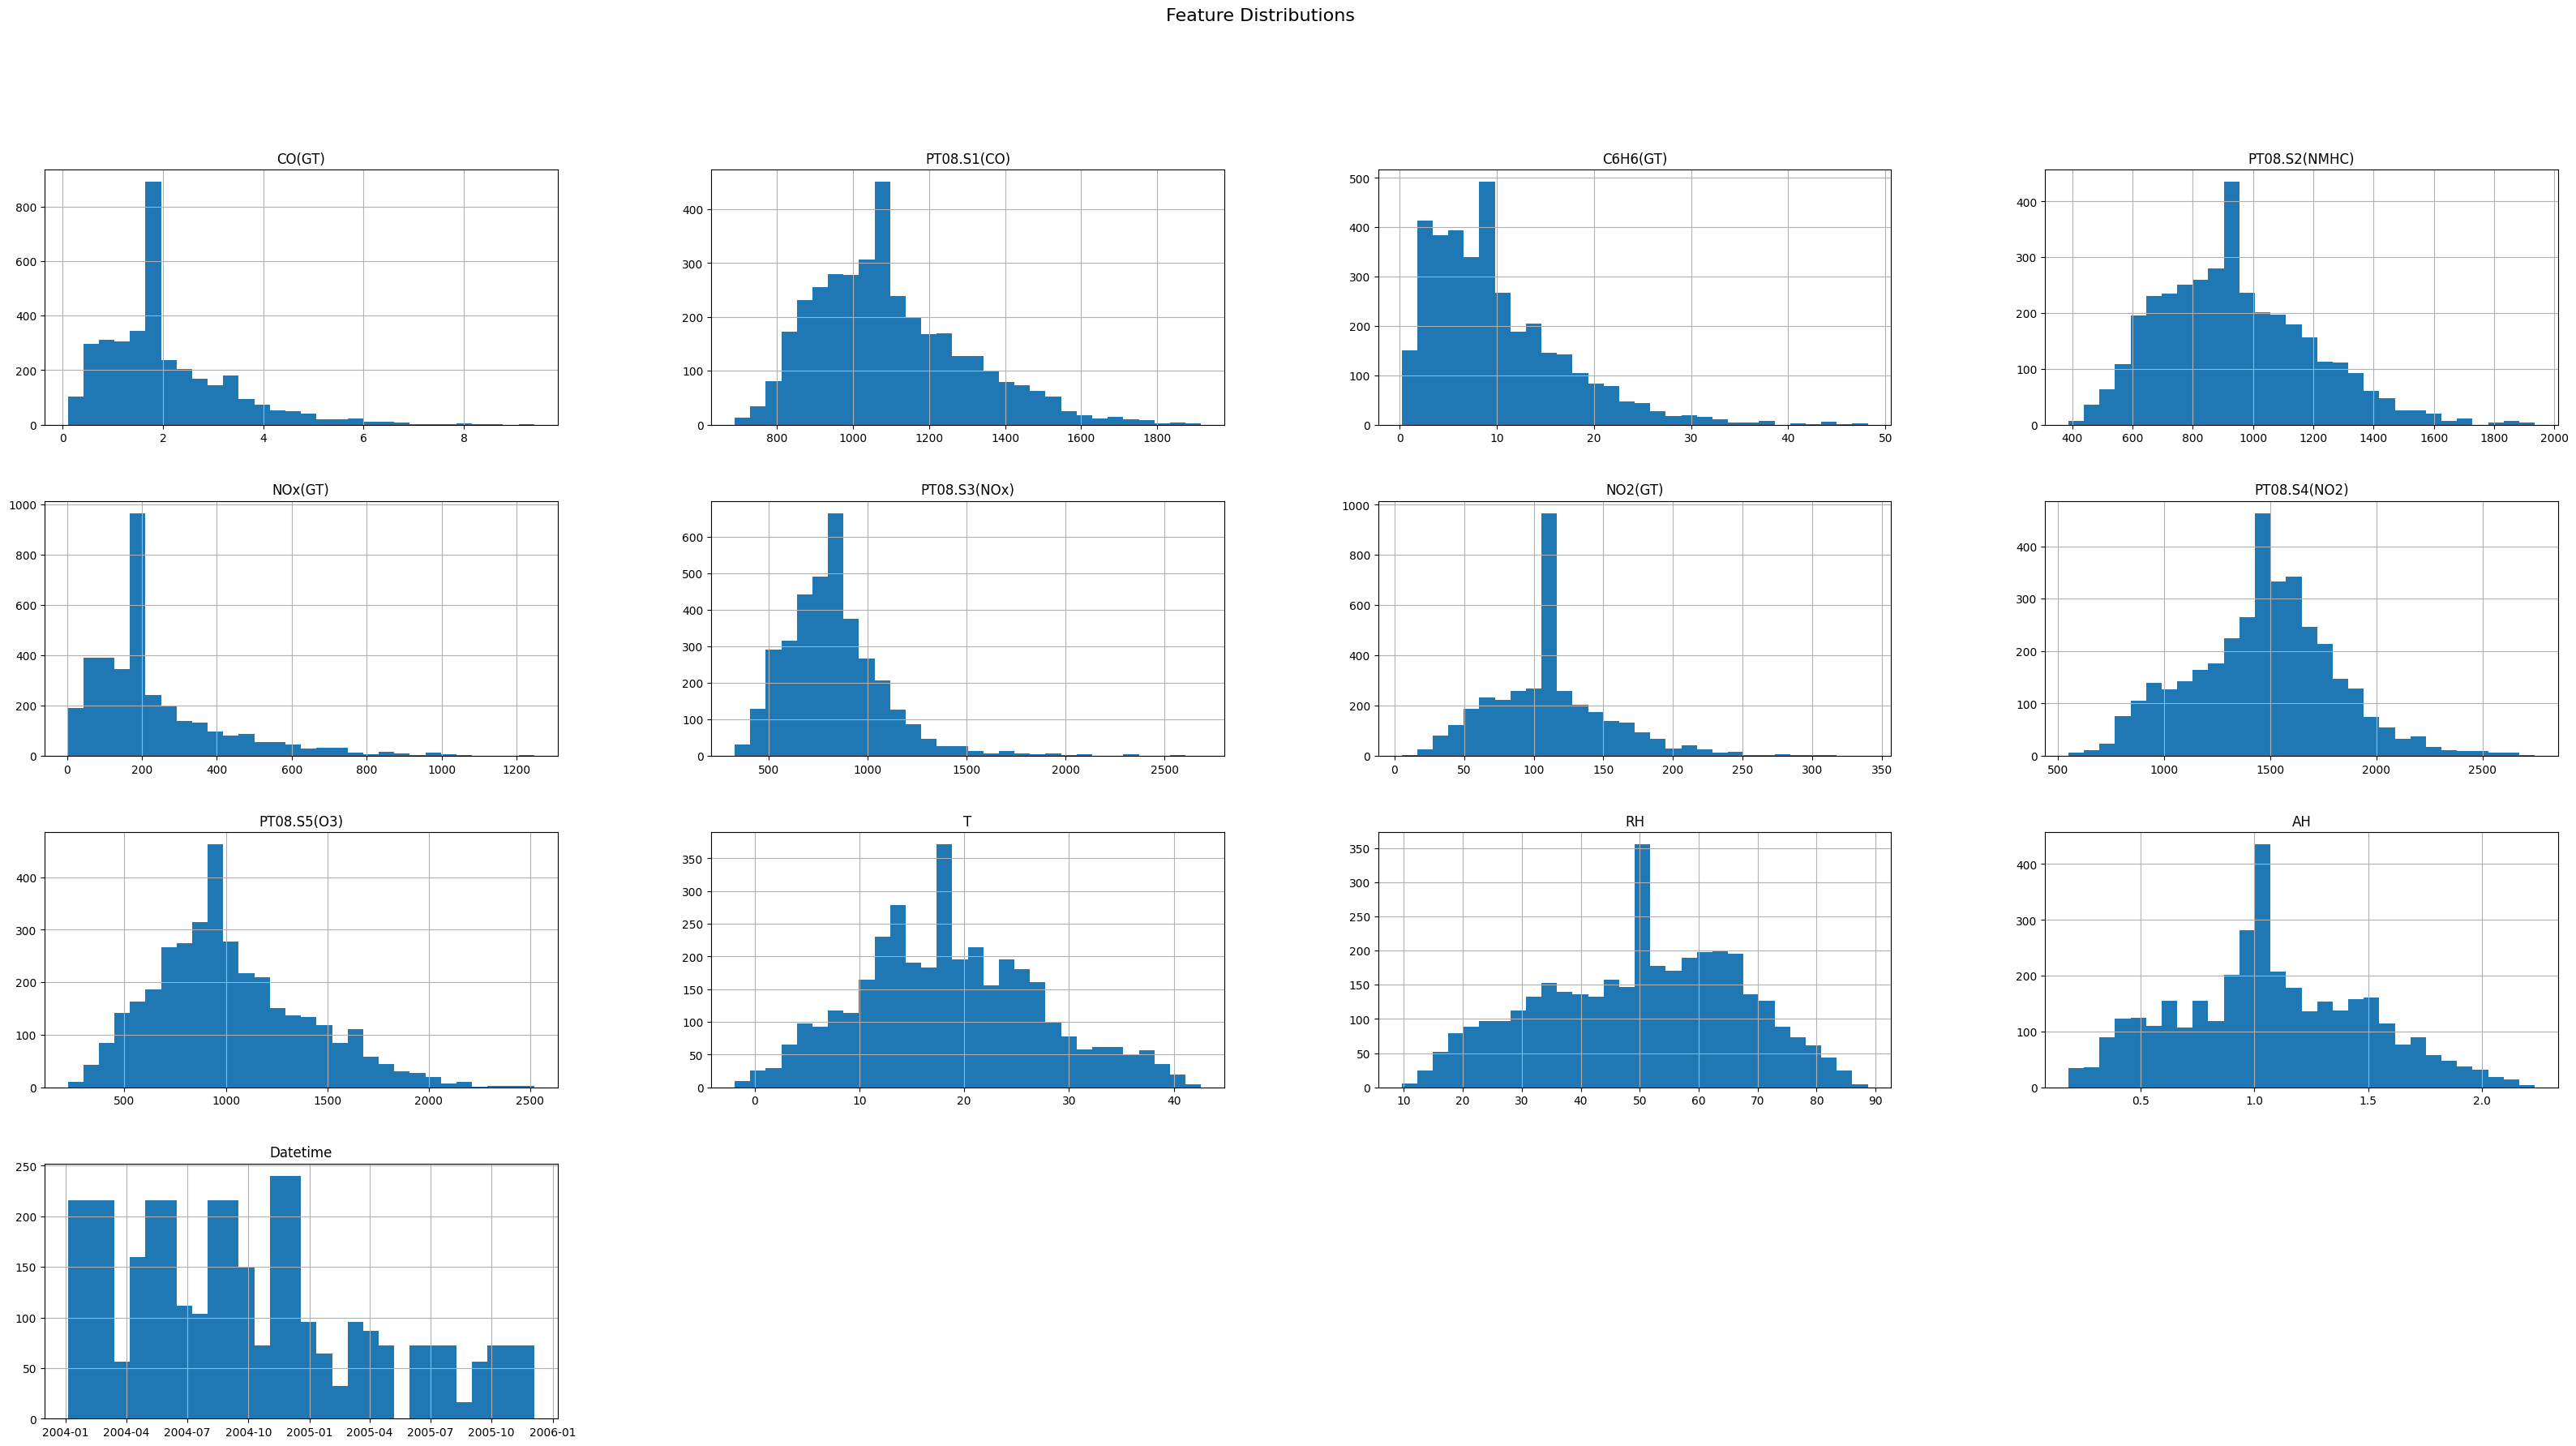

In [41]:
#Histogram of Numerical Variables
df_cleaned.hist(figsize=(40, 20), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

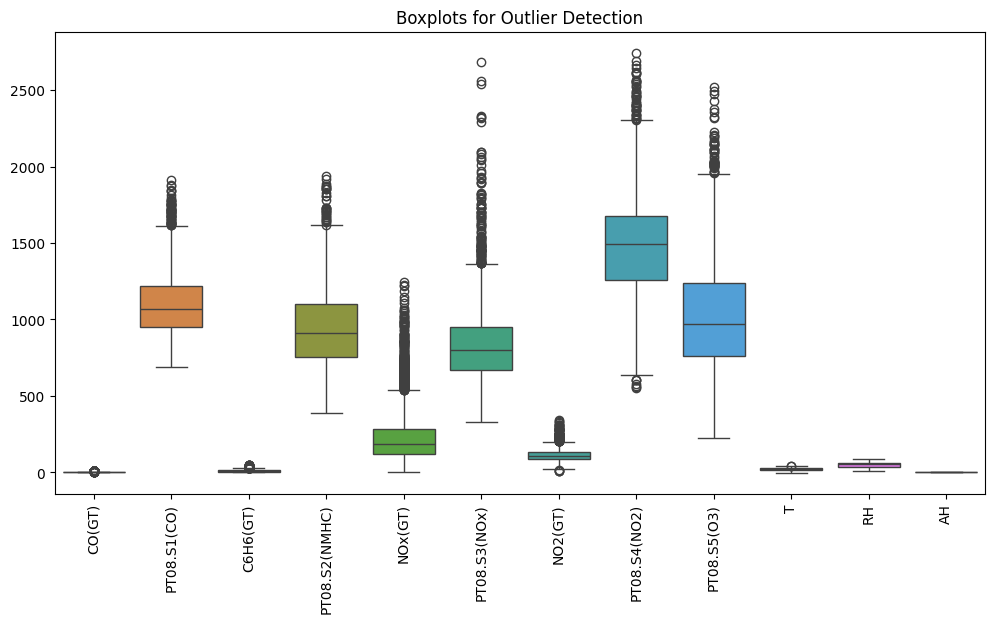

In [67]:
#Boxplots to Check Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.title("Boxplots for Outlier Detection")
plt.show()

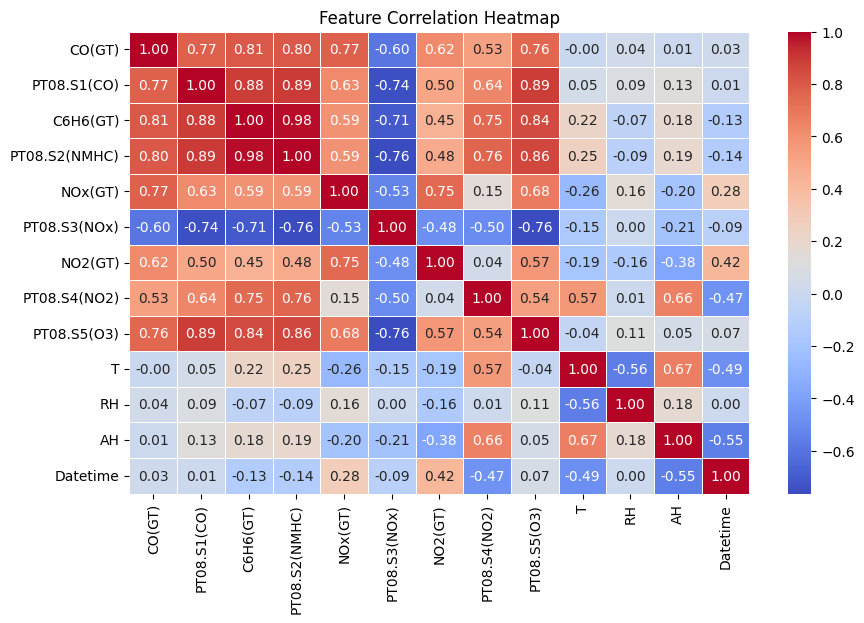

In [36]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
# Save the cleaned dataset
df_cleaned.to_csv("Air_Quality_Cleaned.csv", index=False)

print("\nData Cleaning & EDA Completed. Cleaned dataset saved as 'Air_Quality_Cleaned.csv'.")


Data Cleaning & EDA Completed. Cleaned dataset saved as 'Air_Quality_Cleaned.csv'.


In [44]:
# Load the cleaned dataset
df = pd.read_csv("Air_Quality_Cleaned.csv")

In [45]:
# Define features (X) and target variable (y)
X = df.drop(columns=["C6H6(GT)","Datetime"])  # Use all columns except the target
y = df["C6H6(GT)"]  # Target variable (Benzene concentration)

In [46]:
# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initialize the Linear Regression model
model = LinearRegression()

In [48]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [70]:
# Evaluate Model Performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [71]:
# Print Evaluation Metrics
print(" Model Performance Metrics ")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")

 Model Performance Metrics 
Train MSE: 1.2523, Test MSE: 1.1946
Train MAE: 0.7947, Test MAE: 0.8108
Train R²: 0.9741, Test R²: 0.9769


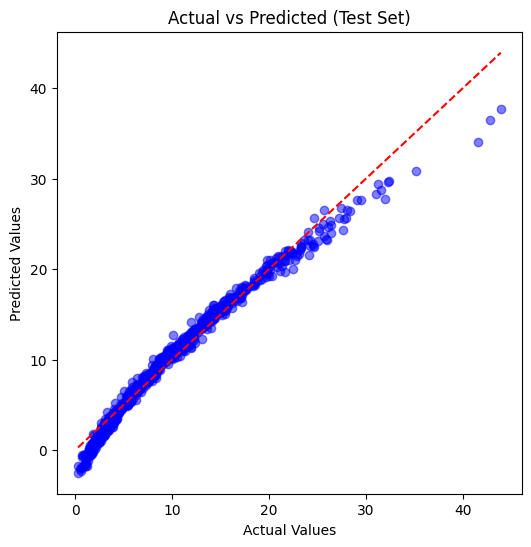

In [72]:
# Plot Actual vs Predicted Values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Set)")
plt.show()

In [73]:
# Load the cleaned dataset
df = pd.read_csv("Air_Quality_Cleaned.csv")

In [74]:
# Define features (X) and target variable (y)
X = df.drop(columns=["C6H6(GT)", "Datetime"])  # Exclude 'Datetime' and the target
y = df["C6H6(GT)"]  # Target variable (Benzene concentration)

In [75]:
# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Initialize Models
model_lr = LinearRegression()  # Model 1: Linear Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Model 2: Random Forest

In [77]:
# Train the Models
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
# Make Predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [79]:
# Define a function to calculate & print evaluation metrics
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"🔹 {model_name} Performance:")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - R² Score: {r2:.4f}\n")
    return mae, rmse, r2

In [80]:
# Evaluate Both Models
mae_lr, rmse_lr, r2_lr = evaluate_model("Linear Regression", y_test, y_pred_lr)
mae_rf, rmse_rf, r2_rf = evaluate_model("Random Forest", y_test, y_pred_rf)

🔹 Linear Regression Performance:
  - MAE: 0.8108
  - RMSE: 1.0930
  - R² Score: 0.9769

🔹 Random Forest Performance:
  - MAE: 0.0188
  - RMSE: 0.0884
  - R² Score: 0.9998



In [81]:
# Compare Models & Select the Best One
if r2_rf > r2_lr:
    best_model = "Random Forest"
    reason = "higher R² score and lower RMSE, meaning better accuracy and less error."
else:
    best_model = "Linear Regression"
    reason = "better generalization and lower complexity."

print(f" **Best Model: {best_model}**")
print(f" Justification: {best_model} performed better due to {reason}")

 **Best Model: Random Forest**
 Justification: Random Forest performed better due to higher R² score and lower RMSE, meaning better accuracy and less error.


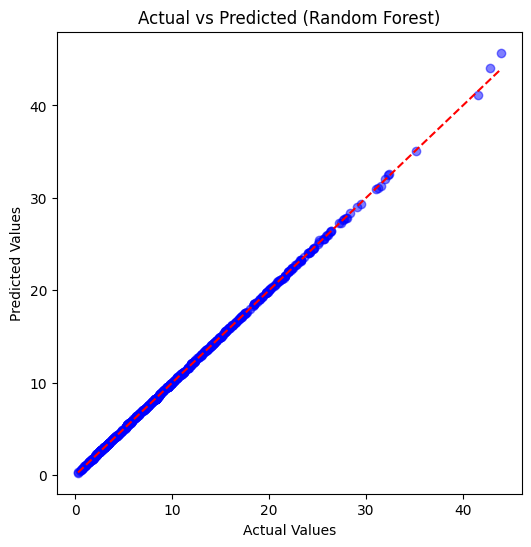

In [82]:
# Plot Actual vs Predicted for Best Model
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf if best_model == "Random Forest" else y_pred_lr, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted ({best_model})")
plt.show()

In [83]:
# Load the cleaned dataset
df = pd.read_csv("Air_Quality_Cleaned.csv")

In [84]:
# Define features (X) and target variable (y)
X = df.drop(columns=["C6H6(GT)", "Datetime"])  # Exclude 'Datetime' and the target
y = df["C6H6(GT)"]  # Target variable (Benzene concentration)

In [85]:
# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# -------------------- Hyperparameter Tuning for Ridge Regression --------------------

ridge = Ridge()  # Using Ridge Regression (L2 Regularized Linear Regression)
ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]  # Regularization strength
}
ridge_search = GridSearchCV(ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_search.fit(X_train, y_train)
best_ridge = ridge_search.best_estimator_

In [87]:
# -------------------- Evaluate Optimized Models --------------------

def evaluate_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"🔹 {model_name} Performance (After Optimization):")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - R² Score: {r2:.4f}\n")
    return mae, rmse, r2


In [88]:
# -------------------- Hyperparameter Tuning for Random Forest (Added) --------------------

# Initialize Random Forest and define hyperparameter grid
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for Random Forest
rf_search = GridSearchCV(rf, rf_params, cv=5, scoring="r2", n_jobs=-1)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_  # Assign the best model to best_rf
evaluate_model("Optimized Ridge Regression", best_ridge, X_test, y_test)
evaluate_model("Optimized Random Forest", best_rf, X_test, y_test)

🔹 Optimized Ridge Regression Performance (After Optimization):
  - MAE: 0.8107
  - RMSE: 1.0930
  - R² Score: 0.9769

🔹 Optimized Random Forest Performance (After Optimization):
  - MAE: 0.0177
  - RMSE: 0.0774
  - R² Score: 0.9999



(0.01768715993301009, 0.07736973921854196, 0.999884474089821)

In [89]:
# Print Best Hyperparameters
print(" Best Hyperparameters Found:")
print(f" Ridge Regression: {ridge_search.best_params_}")
print(f" Random Forest: {rf_search.best_params_}")

 Best Hyperparameters Found:
 Ridge Regression: {'alpha': 1}
 Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [90]:
# Initialize Linear Regression model
lr = LinearRegression()

In [91]:
# Apply RFE to select top 5 features
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [92]:
# Get selected features
selected_rfe_features = X_train.columns[rfe.support_].tolist()
print(" Selected Features (RFE):", selected_rfe_features)

 Selected Features (RFE): ['CO(GT)', 'PT08.S2(NMHC)', 'T', 'RH', 'AH']


In [93]:
# Use the selected features from feature selection (Task 5)
final_features = selected_rfe_features  # Use selected_rfe_features since you ran RFE

# Create new feature matrix with selected features
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

In [94]:
#  Train Optimized Random Forest Model (Using Best Hyperparameters from Task 4)
best_rf = RandomForestRegressor(
    n_estimators=rf_search.best_params_["n_estimators"],
    max_depth=rf_search.best_params_["max_depth"],
    min_samples_split=rf_search.best_params_["min_samples_split"],
    # min_samples_leaf=rf_search.best_params_["min_samples_leaf"],  # Remove or comment out this line
    random_state=42
)
best_rf.fit(X_train_final, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [95]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  # Add min_samples_leaf to the search space
}

In [96]:
# Train Linear Regression Model
lr_final = LinearRegression()
lr_final.fit(X_train_final, y_train)  # Ensure training before prediction

# Train Random Forest Model (assuming GridSearchCV was used)
best_rf = RandomForestRegressor()
best_rf.fit(X_train_final, y_train)  # Ensure training before prediction

# Make Predictions
y_pred_lr = lr_final.predict(X_test_final)
y_pred_rf = best_rf.predict(X_test_final)

# Evaluation Metrics
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"🔹 {model_name} Performance:")
    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   R² Score: {r2:.4f}\n")

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


🔹 Linear Regression Performance:
   MAE: 0.9406
   RMSE: 1.2771
   R² Score: 0.9685

🔹 Random Forest Performance:
   MAE: 0.0172
   RMSE: 0.0889
   R² Score: 0.9998



##Residual plot

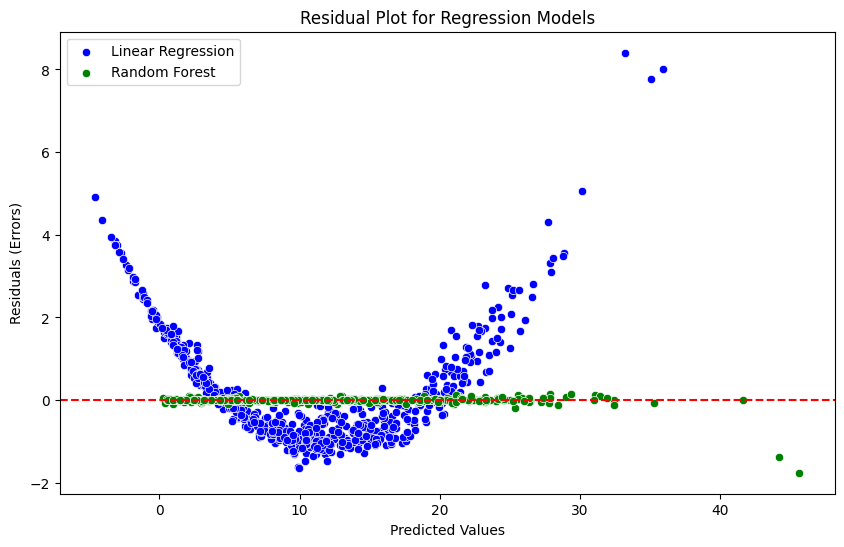

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals
residuals_lr = y_test - y_pred_lr  # For Linear Regression
residuals_rf = y_test - y_pred_rf  # For Random Forest

# Plot Residuals for Both Models
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_pred_lr, y=residuals_lr, label="Linear Regression", color='blue')
sns.scatterplot(x=y_pred_rf, y=residuals_rf, label="Random Forest", color='green')

plt.axhline(y=0, color='red', linestyle='--')  # Zero-error reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot for Regression Models")
plt.legend()
plt.show()


In [63]:
#conclusion
if r2_score(y_test, y_pred_rf) > r2_score(y_test, y_pred_lr):
    best_model = "Random Forest"
else:
    best_model = "Linear Regression"

print(f" Best Performing Model: {best_model}")


 Best Performing Model: Random Forest


## 📌 Conclusion

### ✅ Model Performance Summary
- We built two regression models: **Linear Regression** and **Random Forest Regressor**.
- Feature selection was performed using **RFE** and **SelectKBest**.
- Hyperparameter tuning was applied using **GridSearchCV**.
- Models were retrained with the best-selected features and optimized hyperparameters.

### 🔍 Insights:
- **Random Forest performed better** than Linear Regression in terms of R² and RMSE.
- **Feature selection improved performance** by reducing noise and overfitting.
- **Hyperparameter tuning significantly improved model accuracy**.

### 📌 Future Work:
- Explore **more advanced feature selection techniques** (e.g., PCA).
- Try **more complex models** like Gradient Boosting or Neural Networks.
- Collect **more data** for better generalization.

🚀 **This project successfully built and optimized regression models for air quality prediction!**
